In [43]:
# load in images
# test 
import numpy as np
import io
import torch
import torch.nn as nn
import math
from collections import OrderedDict
import torchvision.transforms as transforms
from PIL import Image
import os

In [44]:
# Create dictionary to labels
label_dict = {}
with open('./data/1/morph_all_label.txt') as f:
    for line in f:
        (key, val) = line.split()
        label_dict[key] = val

# Create dictionary to labels 2 - temporary, combine later
label_dict_2 = {}
with open('./data/1/morph_all_label_2.txt') as f:
    for line in f:
        (key, val) = line.split()
        label_dict_2[key] = val
        
# Create dictionary to labels 3 - temporary, combine later
label_dict_3 = {}
with open('./data/1/morph_all_label_3.txt') as f:
    for line in f:
        (key, val) = line.split()
        label_dict_3[key] = val


In [38]:
def read_img(root, filedir, transform=None):
    # Data loading
    with open(filedir, 'r') as f:
        lines = f.readlines()  
    output = []    
    for line in lines:
        linesplit = line.split('\n')[0].split(' ')
        #print(linesplit)
        addr = linesplit[0]
        target = torch.Tensor([float(linesplit[1])])
        img = Image.open(os.path.join(root, addr)).convert('RGB')

        if transform is not None:
            img = transform(img)
        
        output.append([img, target])

    return output

In [4]:
root = './data/morph2'
valdir = './data/1/test2morph.txt'

In [39]:
import random

import cv2
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt

#ÍBS: I need this for my kernel not to die
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import albumentations as A

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [40]:
#Lesa inn myndir úr directory og skrifa þær í byrjun inn í nýtt directory 

folder_dir = './data/morph_all'
for images in os.listdir(folder_dir):
 
    # check if the image/file ends with png
    if (images.endswith(".png")):
        print(images)

image1.png
image10.png
image11.png
image12.png
image13.png
image14.png
image15.png
image16.png
image17.png
image18.png
image19.png
image2.png
image20.png
image21.png
image22.png
image23.png
image24.png
image25.png
image26.png
image27.png
image28.png
image29.png
image3.png
image30.png
image31.png
image32.png
image33.png
image34.png
image35.png
image36.png
image37.png
image38.png
image39.png
image4.png
image40.png
image41.png
image42.png
image43.png
image44.png
image45.png
image46.png
image47.png
image48.png
image49.png
image5.png
image50.png
image51.png
image52.png
image53.png
image54.png
image55.png
image56.png
image57.png
image58.png
image59.png
image6.png
image60.png
image7.png
image8.png
image9.png


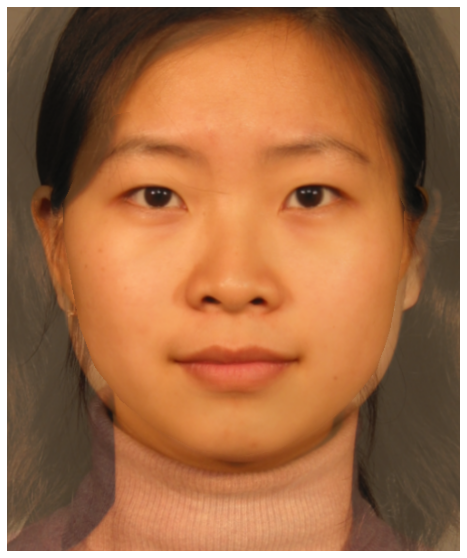

In [45]:
#image[90:450, 0:290]

path = './data/morph_all/image1.png'
image_import = cv2.imread(path)
image_raw = cv2.cvtColor(image_import, cv2.COLOR_BGR2RGB)
visualize(image_raw)

size_img = np.shape(image_raw)
#augmented_image = transform(image=image_raw)['image1.png']
#size_img[0]*0.75

# crop right
transform = A.Crop(x_min=0, y_min=0, x_max=int(size_img[1]*0.80), y_max=size_img[0], always_apply=True, p=1.0)
augmented_image = transform(image=image_raw)['image']
#visualize(augmented_image)

# crop left
transform = A.Crop(x_min=int(size_img[1]*0.20), y_min=0, x_max=size_img[1], y_max=size_img[0], always_apply=True, p=1.0)
augmented_image = transform(image=image_raw)['image']
#visualize(augmented_image)

# crop bottom
transform = A.Crop(x_min=0, y_min=0, x_max=size_img[1], y_max=int(size_img[0]*0.80), always_apply=True, p=1.0)
augmented_image = transform(image=image_raw)['image']
#visualize(augmented_image)

# crop top
transform = A.Crop(x_min=0, y_min=int(size_img[0]*0.20), x_max=size_img[1], y_max=size_img[0], always_apply=True, p=1.0)
augmented_image = transform(image=image_raw)['image']
#visualize(augmented_image)



#class albumentations.augmentations.crops.transforms.Crop (x_min=0, y_min=0, x_max=1024, y_max=1024, always_apply=False, p=1.0)

In [60]:
counter = 0
file = open("./data/augment/information.txt", "w")
file_labels = open("./data/augment/image_label_mapping.txt", "w")
for images in os.listdir(folder_dir):
    if (images.endswith(".png")):
        counter = counter + 1
        path = './data/morph_all/'+images
        image_import = cv2.imread(path)
        image_raw = cv2.cvtColor(image_import, cv2.COLOR_BGR2RGB)
        #visualize(image_raw)
        
#         # Flip image horizontally - do this to all photos
#         transform = A.HorizontalFlip(p=1)
#         #random.seed(1)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'horizontal' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
       
         # Blur image limit 5
#         transform = A.Blur(blur_limit=5,always_apply=True)
#         #random.seed(2) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'blur5' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         # Blur image limit 15
#         transform = A.Blur(blur_limit=10,always_apply=True)
#         #random.seed(3)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'blur15' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         #Add random contrast to each image
#         transform = A.RandomContrast(limit=0.7, always_apply=True, p=1)
#         random.seed(203) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'randomcontrast' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         # add gaussian noise to every image
#         transform = A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
#         #random.seed(4) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'gaussian' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         # To grey
#         transform = A.ToGray(always_apply=True, p=0.9)
#         #random.seed(5) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'gray' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         # Hue Saturation
#         transform = A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
#         random.seed(57) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'saturation' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         #Tilt both ways for each image and each augmentation
#         transform = A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         random.seed(100)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         transform = A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         random.seed(102)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        # cropping
        size_img = np.shape(image_raw)
        
        # crop right
        transform = A.Crop(x_min=0, y_min=0, x_max=int(size_img[1]*0.80), y_max=size_img[0], always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'cropright' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')

        #crop left
        transform = A.Crop(x_min=int(size_img[1]*0.20), y_min=0, x_max=size_img[1], y_max=size_img[0], always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'cropleft' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        # crop bottom
        transform = A.Crop(x_min=0, y_min=0, x_max=size_img[1], y_max=int(size_img[0]*0.80), always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'cropbottom' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')

        # crop top
        transform = A.Crop(x_min=0, y_min=int(size_img[0]*0.20), x_max=size_img[1], y_max=size_img[0], always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'croptop' + str(counter)
        path_augment = r'./data/augment/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
#         transform = A.Compose([
#             A.HorizontalFlip(p=1)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(400) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-horizontal' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         transform = A.Compose([
#             A.HorizontalFlip(p=1)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(401) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-horizontal' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
#         transform = A.Compose([
#             A.Blur(blur_limit=5,always_apply=True)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(402) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-blur5' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         transform = A.Compose([
#             A.Blur(blur_limit=5,always_apply=True)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(403) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-blur10' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
#         transform = A.Compose([
#             A.Blur(blur_limit=10,always_apply=True)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(404) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-blur10' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         transform = A.Compose([
#             A.Blur(blur_limit=10,always_apply=True)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(405)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-blur10' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
#         transform = A.Compose([
#             A.RandomContrast(limit=0.7, always_apply=True, p=1)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(206) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-randomcontrast' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         transform = A.Compose([
#             A.RandomContrast(limit=0.7, always_apply=True, p=1)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(407)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-randomcontrast' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
#         transform = A.Compose([
#             A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(208) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-gauss' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         transform = A.Compose([
#             A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(409)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-gauss' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
#         transform = A.Compose([
#             A.ToGray(always_apply=True, p=0.9)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(210) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-gray' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         transform = A.Compose([
#             A.ToGray(always_apply=True, p=0.9)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(411)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-gray' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        
#         transform = A.Compose([
#             A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(212) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-hue' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
#         transform = A.Compose([
#             A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(413)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-hue' + str(counter)
#         path_augment = r'./data/augment/' + augment + '.png'
#         visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict[images] + '\n')
        
        
        
file.close()
file_labels.close()
        
        
        

In [50]:
data = augment_data = ""
  
#Reading data from original data labels
with open("./data/1/morph_all_label.txt") as fp:
    data = fp.read()
    
# Reading data from augmented data labels
with open("./data/augment/image_label_mapping.txt") as fp:
    augment_data = fp.read()

# To add the data of file2
# from next line
data += "\n"
data += augment_data

  
with open ('image_label_mapping.txt', 'w') as fp:
    fp.write(data)
    


In [53]:
#Lesa inn myndir úr directory og skrifa þær í byrjun inn í nýtt directory 

folder_dir = './data/morph_all_2'
for images in os.listdir(folder_dir):
 
    # check if the image/file ends with png
    if (images.endswith(".png")):
        print(images)

image100.png
image101.png
image102.png
image103.png
image104.png
image105.png
image106.png
image107.png
image108.png
image109.png
image110.png
image111.png
image112.png
image113.png
image114.png
image115.png
image116.png
image117.png
image118.png
image119.png
image120.png
image61.png
image62.png
image63.png
image64.png
image65.png
image66.png
image67.png
image68.png
image69.png
image70.png
image71.png
image72.png
image73.png
image74.png
image75.png
image76.png
image77.png
image78.png
image79.png
image80.png
image81.png
image82.png
image83.png
image84.png
image85.png
image86.png
image87.png
image88.png
image89.png
image90.png
image91.png
image92.png
image93.png
image94.png
image95.png
image96.png
image97.png
image98.png
image99.png


In [61]:
counter = 0
file = open("./data/augment2/information.txt", "w")
file_labels = open("./data/augment2/image_label_mapping.txt", "w")
#plt.ioff()

for images in os.listdir(folder_dir):
    if (images.endswith(".png")):
        #matplotlib.use('Agg')
        counter = counter + 1
        path = './data/morph_all_2/'+images
        image_import = cv2.imread(path)
        image_raw = cv2.cvtColor(image_import, cv2.COLOR_BGR2RGB)
        #visualize(image_raw)
        
        # Flip image horizontally - do this to all photos
#         transform = A.HorizontalFlip(p=1)
#         #random.seed(1)
#         fig = plt.figure()
#         augmented_image = transform(image=image_raw)['image']
        augment = 'horizontal' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         #result=cv2.imwrite(path_augment, augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
#         plt.close(fig)
        
#         plt.show()
        
#         transform = A.Blur(blur_limit=5,always_apply=True)
#         #random.seed(2) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'blur5' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
#         # Blur image limit 15
#         transform = A.Blur(blur_limit=10,always_apply=True)
#         #random.seed(3)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'blur15' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
#         #Add random contrast to each image
#         transform = A.RandomContrast(limit=0.7, always_apply=True, p=1)
#         random.seed(203) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'randomcontrast' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
#         # add gaussian noise to every image
#         transform = A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
#         #random.seed(4) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'gaussian' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
#         # To grey
#         transform = A.ToGray(always_apply=True, p=0.9)
#         #random.seed(5) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'gray' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
#         # Hue Saturation
#         transform = A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
#         random.seed(57) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'saturation' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
#         #Tilt both ways for each image and each augmentation
#         transform = A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         random.seed(100)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
#         transform = A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         random.seed(102)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        # cropping
        size_img = np.shape(image_raw)
        
         # crop right
        transform = A.Crop(x_min=0, y_min=0, x_max=int(size_img[1]*0.80), y_max=size_img[0], always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'cropright' + str(counter)
        path_augment = r'./data/augment2/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')

        #crop left
        transform = A.Crop(x_min=int(size_img[1]*0.20), y_min=0, x_max=size_img[1], y_max=size_img[0], always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'cropleft' + str(counter)
        path_augment = r'./data/augment2/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        # crop bottom
        transform = A.Crop(x_min=0, y_min=0, x_max=size_img[1], y_max=int(size_img[0]*0.80), always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'cropbottom' + str(counter)
        path_augment = r'./data/augment2/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')

        # crop top
        transform = A.Crop(x_min=0, y_min=int(size_img[0]*0.20), x_max=size_img[1], y_max=size_img[0], always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'croptop' + str(counter)
        path_augment = r'./data/augment2/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.HorizontalFlip(p=1)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(400) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-horizontal' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
#         transform = A.Compose([
#             A.HorizontalFlip(p=1)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(401) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-horizontal' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.Blur(blur_limit=5,always_apply=True)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(402) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-blur5' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.Blur(blur_limit=5,always_apply=True)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(403) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-blur10' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.Blur(blur_limit=10,always_apply=True)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(404) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-blur10' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.Blur(blur_limit=10,always_apply=True)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(405)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-blur10' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.RandomContrast(limit=0.7, always_apply=True, p=1)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(206) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-randomcontrast' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.RandomContrast(limit=0.7, always_apply=True, p=1)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(407)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-randomcontrast' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(208) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-gauss' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(409)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-gauss' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.ToGray(always_apply=True, p=0.9)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(210) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-gray' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.ToGray(always_apply=True, p=0.9)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(411)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-gray' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
        
#         transform = A.Compose([
#             A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
#             ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(212) 
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-hue' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
#         transform = A.Compose([
#             A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
#             ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
#         ])
#         random.seed(413)
#         augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-hue' + str(counter)
#         path_augment = r'./data/augment2/' + augment + '_' + images + '.png'
#         #visualize(augmented_image)
#         plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_2[images] + '\n')
        
        
        
file.close()
file_labels.close()
        
        
        

In [56]:
#Collecting all labels and map together

data = augment_data = ""
  
#Reading data from original data labels
with open("./data/1/morph_all_label_2.txt") as fp:
    data = fp.read()
    
# Reading data from augmented data labels
with open("./data/augment2/image_label_mapping.txt") as fp:
    augment_data = fp.read()

# To add the data of file2
# from next line
data += "\n"
data += augment_data

  
with open ('image_label_mapping.txt', 'w') as fp:
    fp.write(data)

In [57]:
#Lesa inn myndir úr directory og skrifa þær í byrjun inn í nýtt directory 

folder_dir = './data/morph_all_3'
for images in os.listdir(folder_dir):
 
    # check if the image/file ends with png
    if (images.endswith(".png")):
        print(images)

image121.png
image122.png
image123.png
image124.png
image125.png
image126.png
image127.png
image128.png
image129.png
image130.png
image131.png
image132.png
image133.png
image134.png
image135.png
image136.png
image137.png
image138.png
image139.png
image140.png
image141.png
image142.png


In [62]:
counter = 0
file = open("./data/augment3/information.txt", "w")
file_labels = open("./data/augment3/image_label_mapping.txt", "w")
for images in os.listdir(folder_dir):
    if (images.endswith(".png")):
        counter = counter + 1
        path = './data/morph_all_3/'+images
        image_import = cv2.imread(path)
        image_raw = cv2.cvtColor(image_import, cv2.COLOR_BGR2RGB)
        #visualize(image_raw)
        
        # Flip image horizontally - do this to all photos
        transform = A.HorizontalFlip(p=1)
        #random.seed(1)
        augmented_image = transform(image=image_raw)['image']
        augment = 'horizontal' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
       
        # Blur image limit 5
        transform = A.Blur(blur_limit=5,always_apply=True)
        #random.seed(2) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'blur5' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        # Blur image limit 15
        transform = A.Blur(blur_limit=10,always_apply=True)
        #random.seed(3)
        augmented_image = transform(image=image_raw)['image']
        augment = 'blur15' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        #Add random contrast to each image
        transform = A.RandomContrast(limit=0.7, always_apply=True, p=1)
        random.seed(203) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'randomcontrast' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        # add gaussian noise to every image
        transform = A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
        #random.seed(4) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'gaussian' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        # To grey
        transform = A.ToGray(always_apply=True, p=0.9)
        #random.seed(5) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'gray' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        # Hue Saturation
        transform = A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
        random.seed(57) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'saturation' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        #Tilt both ways for each image and each augmentation
        transform = A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        random.seed(100)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        random.seed(102)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        # cropping
        size_img = np.shape(image_raw)
        
        # crop right
        transform = A.Crop(x_min=0, y_min=0, x_max=int(size_img[1]*0.80), y_max=size_img[0], always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'cropright' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')

        #crop left
        transform = A.Crop(x_min=int(size_img[1]*0.20), y_min=0, x_max=size_img[1], y_max=size_img[0], always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'cropleft' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        # crop bottom
        transform = A.Crop(x_min=0, y_min=0, x_max=size_img[1], y_max=int(size_img[0]*0.80), always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'cropbottom' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')

        # crop top
        transform = A.Crop(x_min=0, y_min=int(size_img[0]*0.20), x_max=size_img[1], y_max=size_img[0], always_apply=True, p=1.0)
        augmented_image = transform(image=image_raw)['image']
        augment = 'croptop' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.HorizontalFlip(p=1)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(400) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-horizontal' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.HorizontalFlip(p=1)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(401) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-horizontal' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.Blur(blur_limit=5,always_apply=True)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(402) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-blur5' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        transform = A.Compose([
            A.Blur(blur_limit=5,always_apply=True)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(403) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-blur10' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.Blur(blur_limit=10,always_apply=True)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(404) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-blur10' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.Blur(blur_limit=10,always_apply=True)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(405)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-blur10' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.RandomContrast(limit=0.7, always_apply=True, p=1)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(206) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-randomcontrast' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.RandomContrast(limit=0.7, always_apply=True, p=1)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(407)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-randomcontrast' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(208) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-gauss' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.GaussNoise(var_limit=(10, 50), always_apply=True, p=1)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(409)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-gauss' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.ToGray(always_apply=True, p=0.9)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(210) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-gray' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.ToGray(always_apply=True, p=0.9)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(411)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-gray' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        
        transform = A.Compose([
            A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
            ,A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(212) 
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltleft-hue' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        transform = A.Compose([
            A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)
            ,A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
        ])
        random.seed(413)
        augmented_image = transform(image=image_raw)['image']
        augment = 'tiltright-hue' + str(counter)
        path_augment = r'./data/augment3/' + augment + '.png'
        visualize(augmented_image)
        plt.savefig(path_augment,bbox_inches='tight',pad_inches = 0)#,figsize=(500, 600))
        file.write(images + " " + augment + '.png \n')
        file_labels.write(augment + '.png ' + label_dict_3[images] + '\n')
        
        
        
file.close()
file_labels.close()

In [59]:
#Collecting all labels and map together

data = augment_data = data_2 = augment_data_2 = data_3 = augment_data_3 = ""
  
#Reading data from original data labels
with open("./data/1/morph_all_label.txt") as fp:
    data = fp.read()
    
with open("./data/1/morph_all_label_2.txt") as fp:
    data_2 = fp.read()
    
with open("./data/1/morph_all_label_3.txt") as fp:
    data_3 = fp.read()
    
# Reading data from augmented data labels
with open("./data/augment/image_label_mapping.txt") as fp:
    augment_data = fp.read()

with open("./data/augment2/image_label_mapping.txt") as fp:
    augment_data_2 = fp.read()
    
with open("./data/augment3/image_label_mapping.txt") as fp:
    augment_data_3 = fp.read()

# To add the data of file2
# from next line
data += "\n"
data += data_2
data += "\n"
data += data_3
data += "\n"
data += augment_data
data += "\n"
data += augment_data_2
data += "\n"
data += augment_data_3

  
with open ('image_label_mapping.txt', 'w') as fp:
    fp.write(data)